In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
train_dir = "../input/train/train/"
test_dir = "../input/test/test/"
train_df = pd.read_csv('../input/train.csv')
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


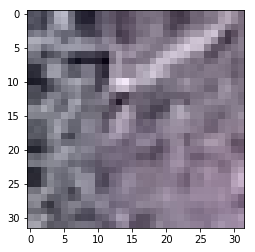

In [3]:
im = cv2.imread("../input/train/train/01e30c0ba6e91343a12d2126fcafc0dd.jpg")
plt.imshow(im)

In [7]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [8]:
vgg16_net.trainable = False
vgg16_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [9]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [12]:
X_tr = []
Y_tr = []
imges = train_df['id'].values
for img_id in tqdm_notebook(imges):
    X_tr.append(cv2.imread(train_dir + img_id))    
    Y_tr.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
X_tr = np.asarray(X_tr)
X_tr = X_tr.astype('float32')
X_tr /= 255
Y_tr = np.asarray(Y_tr)

In [13]:
batch_size = 32
nb_epoch = 1000

In [ ]:
%%time
# Train model
history = model.fit(X_tr, Y_tr,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 15750 samples, validate on 1750 samples
Epoch 1/1000
 - 6s - loss: 0.5832 - acc: 0.6982 - val_loss: 0.4744 - val_acc: 0.7463
Epoch 2/1000
 - 4s - loss: 0.4593 - acc: 0.7830 - val_loss: 0.3963 - val_acc: 0.7634
Epoch 3/1000
 - 4s - loss: 0.3964 - acc: 0.8149 - val_loss: 0.3424 - val_acc: 0.8497
Epoch 4/1000
 - 4s - loss: 0.3452 - acc: 0.8529 - val_loss: 0.3049 - val_acc: 0.8994
Epoch 5/1000
 - 4s - loss: 0.3096 - acc: 0.8737 - val_loss: 0.2752 - val_acc: 0.9200
Epoch 6/1000
 - 4s - loss: 0.2826 - acc: 0.8938 - val_loss: 0.2526 - val_acc: 0.9280
Epoch 7/1000
 - 4s - loss: 0.2600 - acc: 0.9060 - val_loss: 0.2344 - val_acc: 0.9303
Epoch 8/1000
 - 4s - loss: 0.2425 - acc: 0.9137 - val_loss: 0.2192 - val_acc: 0.9377
Epoch 9/1000
 - 4s - loss: 0.2288 - acc: 0.9194 - val_loss: 0.2072 - val_acc: 0.9377
Epoch 10/1000
 - 4s - loss: 0.2154 - acc: 0.9260 - val_loss: 0.1970 - val_acc: 0.9440
Epoch 11/1000
 - 4s - loss: 0.2080 - acc: 0.9275 - v

Epoch 93/1000
 - 4s - loss: 0.0922 - acc: 0.9660 - val_loss: 0.0890 - val_acc: 0.9646
Epoch 94/1000
 - 4s - loss: 0.0928 - acc: 0.9650 - val_loss: 0.0890 - val_acc: 0.9646
Epoch 95/1000
 - 4s - loss: 0.0920 - acc: 0.9663 - val_loss: 0.0886 - val_acc: 0.9663
Epoch 96/1000
 - 4s - loss: 0.0909 - acc: 0.9668 - val_loss: 0.0884 - val_acc: 0.9657
Epoch 97/1000
 - 4s - loss: 0.0912 - acc: 0.9667 - val_loss: 0.0883 - val_acc: 0.9646
Epoch 98/1000
 - 4s - loss: 0.0912 - acc: 0.9670 - val_loss: 0.0881 - val_acc: 0.9657
Epoch 99/1000
 - 4s - loss: 0.0900 - acc: 0.9669 - val_loss: 0.0876 - val_acc: 0.9663
Epoch 100/1000
 - 4s - loss: 0.0897 - acc: 0.9677 - val_loss: 0.0876 - val_acc: 0.9646
Epoch 101/1000
 - 4s - loss: 0.0892 - acc: 0.9682 - val_loss: 0.0872 - val_acc: 0.9663
Epoch 102/1000
 - 4s - loss: 0.0893 - acc: 0.9670 - val_loss: 0.0870 - val_acc: 0.9663
Epoch 103/1000
 - 4s - loss: 0.0895 - acc: 0.9667 - val_loss: 0.0868 - val_acc: 0.9663
Epoch 104/1000
 - 4s - loss: 0.0891 - acc: 0.9678 

Epoch 188/1000
 - 4s - loss: 0.0721 - acc: 0.9728 - val_loss: 0.0754 - val_acc: 0.9697
Epoch 189/1000
 - 4s - loss: 0.0717 - acc: 0.9735 - val_loss: 0.0753 - val_acc: 0.9697
Epoch 190/1000
 - 4s - loss: 0.0727 - acc: 0.9752 - val_loss: 0.0750 - val_acc: 0.9709
Epoch 191/1000
 - 4s - loss: 0.0722 - acc: 0.9738 - val_loss: 0.0750 - val_acc: 0.9709
Epoch 192/1000
 - 4s - loss: 0.0721 - acc: 0.9735 - val_loss: 0.0748 - val_acc: 0.9709
Epoch 193/1000
 - 4s - loss: 0.0720 - acc: 0.9731 - val_loss: 0.0748 - val_acc: 0.9709
Epoch 194/1000
 - 4s - loss: 0.0722 - acc: 0.9732 - val_loss: 0.0748 - val_acc: 0.9703
Epoch 195/1000
 - 4s - loss: 0.0716 - acc: 0.9731 - val_loss: 0.0748 - val_acc: 0.9703
Epoch 196/1000
 - 4s - loss: 0.0715 - acc: 0.9740 - val_loss: 0.0746 - val_acc: 0.9697
Epoch 197/1000
 - 4s - loss: 0.0717 - acc: 0.9735 - val_loss: 0.0744 - val_acc: 0.9703
Epoch 198/1000
 - 4s - loss: 0.0716 - acc: 0.9723 - val_loss: 0.0743 - val_acc: 0.9709
Epoch 199/1000
 - 4s - loss: 0.0715 - acc: 

In [ ]:
with open('history.json', 'w') as f:
    json.dump(history.history, f)

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()

In [ ]:
%%time
X_tst = []
Test_imgs = []
for img_id in tqdm_notebook(os.listdir(test_dir)):
    X_tst.append(cv2.imread(test_dir + img_id))     
    Test_imgs.append(img_id)
X_tst = np.asarray(X_tst)
X_tst = X_tst.astype('float32')
X_tst /= 255

In [ ]:
# Prediction
test_predictions = model.predict(X_tst)

In [ ]:
sub_df = pd.DataFrame(test_predictions, columns=['has_cactus'])
sub_df['has_cactus'] = sub_df['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0)

In [ ]:
sub_df['id'] = ''
cols = sub_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
sub_df=sub_df[cols]

In [ ]:
for i, img in enumerate(Test_imgs):
    sub_df.set_value(i,'id',img)

In [ ]:
sub_df.head()

In [ ]:
sub_df.to_csv('submission.csv',index=False)